# Aula 10 - Otimização

Problemas de otimização são caracterizados por um número de graus de liberdade maior do que zero (GL > 0). Por exemplo, se possuímos 2 equações mas 3 incógnitas a serem descobertas, temos um problema de otimização com 1 grau de liberdade (univariável). <br>
Problemas deste tipo são muito comuns em engenharia. Durante o projeto de um processo, normalmente, não conhecemos todas as variáveis necessárias para os cálculos do projeto, exigindo, assim, o uso de técnicas de otimização. Também, é muito comum o uso de técnicas de otimização na estimação de parâmetros, procurando diminuir ao máximo a diferença entre um modelo matemático que descreva o fenômeno e o próprio fenômeno sendo descrito. <br>
<br>
**Exemplo 1 - Mínimo irrestrito univariável** <br>
Considere, inicialmente, a função $f(x) = (x-2)x(x+2)^2$. <br>
Para encontrar o mínimo desta função podemos utilizar a função _minimize_scalar_ do pacote de otimização do SciPy. <br>

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458
1.2807764040333458
-9.914949590828147


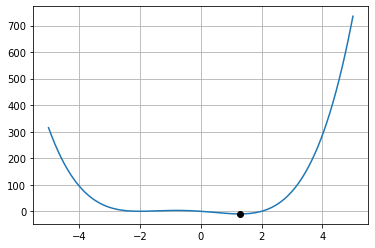

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
# Declaração da função a ser minimizada
def minf(x):
    f = (x-2)*x*(x+2)**2
    return f
    # return (x-2)*x*(x+2)**2

sol1 = minimize_scalar(minf) # Chamada da minimização
print(sol1)        # Solução completa
print(sol1.x)     # Apenas o resultado de x
print(sol1.fun)   # Valor da função em x (f(x))

# Gráfico para visualização
x = np.linspace(-5,5,200)
f = (x-2)*x*(x+2)**2
plt.plot(x,f)
plt.plot(sol1.x,sol1.fun,'ko')
plt.grid()

Iniciamos o código importando as bibliotecas. Dentre elas, importamos a função _minimize_scalar_ do pacote de otimização do SciPy, a qual é responsável pela minimização de uma função univariável, ou seja, que possui apenas um escalar como incógnita. <br>
Definimos a função que será minimizada nas linhas 5-7. Como utilizamos _f_ para simbolizar o valor da função em _x_, utilizamos a mesma variável no comando return (alternativamente, a função poderia ser diretamente digitada na linha do return, conforme o exemplo comentado no código). Assim, o algoritmo da função _minimize_scalar_ irá buscar valor de _x_ que façam com que _f_ assuma o seu menor valor possível. <br>
A chamada dessa função é feita sem chutes iniciais, conforme pode ser visto na linha 10. Assim, o único argumento obrigatório da função _minimize_scalar_ é o nome da própria função a ser minimizada, neste caso _minf_. <br>
Os resultados saem dentro de um objeto, neste código chamado de _sol_ (de solução). Dentro do objeto _sol_ possuímos algumas informações do método, como o valor da função no ponto _x_ encontrado, o número de iterações e, é claro, o próprio resultado de _x_ (você pode verificar isso com os comandos de print das linhas 11-13). <br>
Nas linhas 15-20 criamos um gráfico da função para valores de _x_ entre -5 e 5. Assim, criamos um vetor x (linha 16), calculamos o valor da função em todos os valores de x (linha 17), plotamos a equação em função de x (linha 18), incluímos o ponto de mínimo encontrado na linha 10 no gráfico (linha 19) e incluímos as linahs de grade no plot (linha 20). <br>
É possível perceber, pela figura, que o ponto de mínimo foi encontrado corretamente e, pelo exposto pelas linhas 12 e 13, $x=1.2807$ e $f(x)=-9.9149$. <br>
<br>
Suponha, no entanto, que você deseja encontrar o mínimo da função entre os ponto -4 e 0. Para isso, é possível utilizar o método de Brent com restrições dentro da própria função _minimize_scalar_. <br>

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458
1.2807764040333458
-9.914949590828147
     fun: 4.95339503110702e-12
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: -1.999999213123425
-1.999999213123425
4.95339503110702e-12


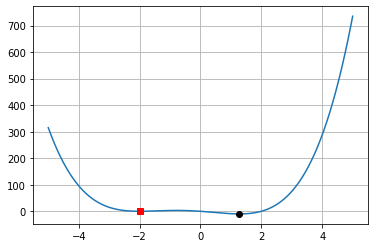

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
# Declaração da função a ser minimizada
def minf(x):
    f = (x-2)*x*(x+2)**2
    return f
    # return (x-2)*x*(x+2)**2

sol1 = minimize_scalar(minf) # Chamada da minimização
print(sol1)        # Solução completa
print(sol1.x)     # Apenas o resultado de x
print(sol1.fun)   # Valor da função em x (f(x))

sol2 = minimize_scalar(minf, bounds=(-4, -0), method='bounded')
print(sol2)        # Solução completa
print(sol2.x)     # Apenas o resultado de x
print(sol2.fun)   # Valor da função em x (f(x))

# Gráfico para visualização
x = np.linspace(-5,5,200)
f = (x-2)*x*(x+2)**2
plt.plot(x,f)
plt.plot(sol1.x,sol1.fun,'ko')
plt.plot(sol2.x,sol2.fun,'rs')
plt.grid()


Assim, adicionamos uma segunda solução utilizando restrições (linha 15). A sintaxe da chamada foi levemente alterada, incluindo agora os limites (_bounds=(limite_inferior,limite_superior)_) e o método utilizado (_method='bounded'_). <br>
A nova solução foi gravada no objeto _sol2_ e utilizada para plotar um quadrado vermelho na figura, mostrando o mínimo local da região entre -4 e 0. <br>
<br>
Mais 2 métodos estão disponíveis na otimização univariável: 'brent' e 'golden'. Porém, 'bounded' é o único dos 3 que permite a inclusão de limites de busca. <br>
Mais informações sobre _minimize_scalar_ e seus métodos podem ser vistas na documentação do SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

**Exemplo 2  - Mínimo irrestrito multivariável** <br>
Suponha a seguinte equação $f(x_1,x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$. <br>
A equação possui 2 variáveis: $x_1, x_2$. Sendo assim, possuímos 1 equação e 2 incógnitas, nos deixando 1 grau de liberdade e, portanto, um problema de otimização. <br>
Caso desejemos encontrar o mínimo da função, ou seja, quais valores de $x_1$ e $x_2$ irão resultar no valor mínimo de $f(x_1,x_2)$, podemos utilizar a função _minimize_, também do pacote de otimização do SciPy, cuja sintaxe de uso é: <br>
<br>
_minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)_ <br>
<br>
Onde fun é a função a ser minimizada, x0 são os chutes iniciais, args=() é o campo para argumentos extras, method='' é onde adicionamos o método de minimização escolhido (Nelder-Mead, Powell, dogleg...), jac='' e hess='' são espaços opcionais para adicionarmos as matrizes Jacobiana e Hessiana do problema, entre outras opções (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). <br>
<br>
Note que agora utilizamos a função _minimize_ em vez da função _minimize_scalar_ pois estamos minimizando uma função multivariável (com 2 variáveis, $x_1, x_2$). <br>

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([5.97536573e-06, 1.49011612e-06])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1.])
O valor da função é mínimo em [1. 1.] com um valor igual a 0.0


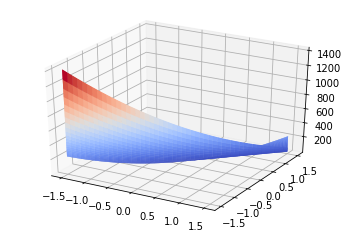

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

# Função a ser minimizada
def minf(x):
    f = 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
    return f

# Chamada da minimização
sol1 = minimize(minf,[1,1])
print(sol1)
print("O valor da função é mínimo em",sol1.x,"com um valor igual a",sol1.fun)

# Gráfico
x1 = np.linspace(-1.5,1.5,50)
x2 = np.linspace(-1.5,1.5,50)
f = np.zeros((x1.size,x2.size))
for i in range(x1.size):
    for j in range(x2.size):
        f[i,j] = 100*(x2[j]-x1[i]**2)**2 + (1-x1[i])**2

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1,x2,f,cmap=cm.coolwarm)
plt.show()

No código acima, importamos as bibliotecas do Numpy, SciPy (optimize -> _minimize_) e matplotlib, esta última teve 2 pacotes importados: o de plotagem (pyplot) e o de mapa de cores (cm, _Color Map_, https://matplotlib.org/3.2.2/api/cm_api.html). O mapa de cores nos permite utilizar o esquema de cores _coolwarm_, especial para gráficos em 3 dimensões (https://matplotlib.org/api/pyplot_summary.html). <br>
A função a ser minimizada possui a mesma definição, tendo como único argumento de entrada o próprio vetor de variáveis a serem encontradas ($X = [x_1, x_2]$). <br>
Da mesma maneira que no exemplo anterior, desejamos minimizar o valor da função de $x_1,x_2$, por este motivo _f_ é a variável utilizada no comando _return_. <br>
A chamada da minimização é feita da maneira mais simplificada, possuindo como argumentos apenas o nome da função a ser minimizada e os chutes iniciais (linha 12). A solução fica gravada no objeto _sol1_. <br>
Assim, utilizando a função _minimize_, podemos encontrar a solução ótima de sistema multivariáveis. Neste caso, encontramos o mínimo da função _f_ para 2 variáveis $x_1, x_2$. Os resultados obtidos são impressos na tela através do comando da linha 14. <br>
<br>
O gráfico para este problema é um gráfico em 3 dimensões, sendo 2 variáveis independentes $x_1, x_2$ nos eixos _X_ e _Y_, e a função $f(x_1,x_2)$ no eixo _Z_. Para tanto, criamos 2 vetores das variáveis independentes ($x_1, x_2$) variando de -1.5 até 1.5 com 50 pontos cada (linhas 17 e 18). <br>
Assim, a função deverá ser uma matriz calculada para cada combinação de $x_1, x_2$, portanto, uma matriz do tamanho dos vetores $x_1, x_2$ em linha e coluna (linha 19). <br>
Nas linhas 20-22 criamos 2 loops para o cômputo dos valores de _f_ para cada combinação de $x_1, x_2$. <br>
Agora possuímos 2 vetores ($x_1, x_2$) e uma matriz _f_ prontos para serem plotados em um gráfico em 3 dimensões. <br>
Para um resultado melhor desta figura, iniciamos alocando a figura criada na linha 24 na variável _fig_. Após isso, na linha 25, atribuímos ao objeto _fig_ o estilo de projeção em 3 dimensões (linha 25) e salvamos essa opção no objeto _ax_. Por fim, utilizamos o objeto _ax_, que já possui configurações para uma figura 3D, com o comando _plot_surface_, o qual recebe como argumentos: <br>
_plot_surface(var_indep1, var_indep2, var_dep, cmap = mapa_de_cores)_ <br>
<br>
A função _minimize_, no entanto, pode utilizar métodos específicos de resolução. Vejamos uma comparação dos resultados dos métodos de Nelder-Mead, Powell e BFGS para o mesmo problema. <br>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função a ser minimizada
def minf(x):
    f = 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
    return f

# Chamada da minimização
sol1 = minimize(minf,[1,1],method='Nelder-Mead')
sol2 = minimize(minf,[1,1],method='Powell')
sol3 = minimize(minf,[1,1],method='BFGS')
print("O método de Nelder-Mead levou",sol1.nit,"iterações para chegar à solução.")
print("O método de Powell levou",sol2.nit,"iterações para chegar à solução.")
print("O método de BFGS levou",sol3.nit,"iterações para chegar à solução.")

O método de Nelder-Mead levou 24 iterações para chegar à solução.
O método de Powell levou 1 iterações para chegar à solução.
O método de BFGS levou 0 iterações para chegar à solução.


<br>

**Exemplo 3 - Maximização Multivariável com Restrições** <br>
Você já deve ter notado que todas as rotinas disponíveis são métodos de **minimização** de função, portanto, caso desejemos **maximizar** uma função (muito comum para funções de lucro) é necessário mudarmos a declaração da função _f_. Por exemplo, considere um sistema com 2 extratores de equilíbrio líquido-líquido que utilizam benzeno para purificação de ácido benzóico de uma solução aquosa. A função que desejamos maximizar é a função lucro. Dado o modelo matemático abaixo que descreve o processo, calcule os valores de $x_1$ e $x_2$ que resultarão no maior lucro. <br>
Modelo matemático: <br>
$Q(x_0 - x_1) - W_1 y_1 = 0$ <br>
$y_1 - kx_1 = 0$ <br>
$Q(x_1 - x_2) - W_2 y_2 = 0$ <br>
$y_2 - kx_2 = 0 $ <br>
Modelo Econômico: <br>
$L = R-C$ <br>
$R = p_{AB}(W_1y_1 + W_2y_2)$ <br>
$C = p_B (W_1 + W_2)$ <br>
Dados: <br>
$Q = 10000 kg/h$ <br>
$x_0 = 0.02 \frac{kg_{AB}}{kg_A}$ <br>
$k = 4 \frac{kg_{AB}/kg_B}{kg_{AB}/kg_{H_2O}} $<br>
$p_{AB} = 0.4 \$/kg $ <br>
$p_B = 0.01 \$/kg $ <br>

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função a ser maximizada
def maxL(x):
    Q = 10000
    x0 = 0.02
    k = 4
    pAB = 0.4
    pB = 0.01
    
    y1 = k*x[0];
    y2 = k*x[1];
    W1 = Q*(x0-x[0])/y1;
    W2 = Q*(x[0]-x[1])/y2;
    
    R = pAB*(W1*y1 + W2*y2)
    C = pB*(W1+W2)
    L = R-C
    return (1/L)
# Chamada da função com chutes iniciais [0.01, 0.01]
sol = minimize(maxL, [0.01, 0.01], method='Powell')
print(sol)
print("Solução:")
print(1/sol.fun)
# Cálculo do Lucro ótimo
Q = 10000
x0 = 0.02
k = 4
pAB = 0.4
pB = 0.01

y1 = k*sol.x[0];
y2 = k*sol.x[1];
W1 = Q*(x0-sol.x[0])/y1;
W2 = Q*(sol.x[0]-sol.x[1])/y2;

R = pAB*(W1*y1 + W2*y2)
C = pB*(W1+W2)
L = R-C
print("Solução manual:")
print(L)

   direc: array([[1., 0.],
       [0., 1.]])
     fun: -97676303.77728795
 message: 'Optimization terminated successfully.'
    nfev: 386
     nit: 4
  status: 0
 success: True
       x: array([0.02917289, 0.0100218 ])
Solução:
-1.0237897640763549e-08
Solução manual:
-1.0237897640763549e-08


Neste exemplo, utilizamos o método de Powell, um dos métodos disponíveis no pacote de otimização do SciPy. <br>
Assim, utilizamos chutes iniciais para as variáveis $x_1$ e $x_2$ em 0.01 para resolver o problema de maximização através da função _minimize_ com o método de Powell. Uma vez que a função _minimize_ realiza uma **minimização** e desejamos, na verdade, uma **maximização** da função objetivo (função Lucro), é importante que no comando _return_ seja utilizado a inversa da função lucro. Assim, quanto maior for o lucro, menor vai ser o valor final da função, portanto, "enganamos" o algoritmo para realizar uma maximização utilizando uma função de minimização. <br>
Uma vez que desejamos **retirar** o componente da corrente principal, é possível perceber que $x_1$ não pode ser maior do que o valor inicial ($x_0 = 0.02$), portanto, $x_1 < x_0$. Da mesma forma, $x_2 < x_1$. <br>
Sendo assim, a solução encontrada não é viável. Isso pode ser confirmado utilizando os valores de $x_1$ e $x_2$ encontrados para o cálculo do Lucro manualmente (linhas 27-43). Note que o resultado é o mesmo obtido pela inversa do valor da função objetivo encontrado, o que confirma, mais uma vez, o resultado final. <br>
Para consertar isso, iremos utilizar um novo método, o método de Newton truncado, denominado 'TNC', com restrições de busca. <br>
As restrições para este problema são estabelecidas da seguinte maneira: <br>
i. Se $x_{AB}$ deve ser retirado da corrente principal, os valores de $x_1$ e $x_2$ devem ser menores do que $x_0$, portanto o limite superior de busca é em $x_0$ (0.02); <br>
ii. Nenhuma fração mássica pode ser menor do que zero, portanto os limites inferiores para $x_1$ e $x_2$ devem ser maiores que $0$. <br>

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função a ser maximizada
def maxL(x):
    Q = 10000
    x0 = 0.02
    k = 4
    pAB = 0.4
    pB = 0.01
    
    y1 = k*x[0];
    y2 = k*x[1];
    W1 = Q*(x0-x[0])/y1;
    W2 = Q*(x[0]-x[1])/y2;
    
    R = pAB*(W1*y1 + W2*y2)
    C = pB*(W1+W2)
    L = R-C
    return (1/L)

sol = minimize(maxL, [0.01, 0.01], method='TNC',bounds=((0,0.02),(0.0,0.02)))
print(sol)
print("O lucro obtido é de",1/sol.fun)

     fun: 0.0513371925851877
     jac: array([-1.67837966e-05,  4.61485017e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 18
     nit: 6
  status: 1
 success: True
       x: array([0.01357208, 0.00921009])
O lucro obtido é de 19.47905504066324


Neste caso, procedemos da mesma maneira ao definir a função _maxL_ e utilizar o inverso da função Lucro como métrica para a minimização (maximizando assim o lucro). A mudança, no entanto, ocorreu no método utilizado e nos limites de busca. A sintaxe da chamada da linha 23 tem a seguinte estrutura: <br>
_resultados = minimize(nome_função, [chutes, iniciais], method='metodo', bounds=((lim_inferior_var1, lim_superior_var1),(lim_inferior_var2, lim_superior_var2)))_ <br>
Assim, os limites de busca são determinados no argumento _bounds_, e seguem a forma de (limite_inferior, limite_superior) para cada variável do problema. Como utilizamos os mesmos limites para as duas variáveis, ambos limites são (0.00, 0.02). <br>

<br>

**Exemplo 4 - Otimização de parâmetros** <br>
<br>
Suponha que você possui uma série de dados de equilíbrio líquido-vapor de uma mistura binária de Etanol (1) + Água (2) a 423.15 K, porém você não possui os parâmetros de interação entre as moléculas para poder elaborar um diagrama de ELV Pxy. Você sabe, no entanto, que é possível utilizar tais dados, juntamente do modelo, para estimar os parâmetros necessários. Assim, você optou por utilizar o modelo de coeficiente de atividade NRTL para descrever a não-idealidade da fase líquida, e portanto você precisa encontrar os parâmetros $g_{12}$, $g_{21}$ e $\alpha$. <br>
Dados: <br>
- Os dados experimentais se encontram no arquivo "dados_VLE.txt": x, y, P (pressão em Psi); <br>
- Utilizaremos solução não-ideal e fase gás ideal; <br>
- $P = P_1 + P_2 = x_1 \gamma_1 P_1 ^{sat} + x_2 \gamma_2 P_2 ^{sat}$ <br>
- $y_i = \frac {x_i \gamma_i P_i ^{sat}}{P}$ <br>
- Antoine: <br>
    A1 = 4.92531; B1 = 1432.526; C1 = -61.819; <br>
    A2 = 3.55959; B2 = 643.7480; C2 = -198.043; <br>
    $log_{10} P_i ^{sat} = A_i - \frac {B_i}{C_i+T}$, sendo T em [K] e P em [bar] <br>
- NRTL para um sistema binário: <br>
<img src="NRTL.png" alt="Drawing" style="width: 300px;"/>


 active_mask: array([0, 0, 0])
        cost: 0.24838593151174015
         fun: array([0.70482045])
        grad: array([-3.53479712e-05, -2.02946910e-04, -8.39690673e-05])
         jac: array([[-5.01517391e-05, -2.87941291e-04, -1.19135402e-04]])
     message: 'Both `ftol` and `xtol` termination conditions are satisfied.'
        nfev: 27
        njev: 15
  optimality: 0.03559472293875804
      status: 4
     success: True
           x: array([1461.79778551, 3598.48093938,  576.09719742])
Parâmetros otimizados:
g12 = 1461.79778551139
g21 = 3598.48093938011
alpha = 0.5760971974246216
Função Objetivo = [0.70482045]


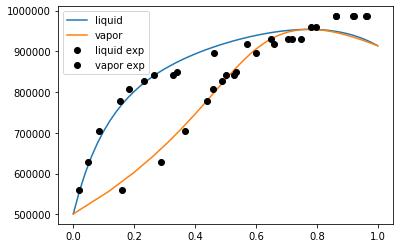

In [228]:
# Importação de funções
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Definição da função de coeficiente de atividade NRTL
def NRTL(x,T,NC,g,alpha,R):
    tau = np.zeros((NC,NC))
    for i in range(NC):
        for j in range(NC):
            tau[i][j] = g[i][j]/(R*T)
    G = np.exp(-alpha*tau)
    num1 = np.zeros(NC)
    den1 = np.zeros(NC)
    num2 = np.zeros(NC)
    num1 = np.zeros(NC)
    den2 = np.zeros(NC)
    num3 = np.zeros(NC)
    den3 = np.zeros(NC)
    lngamma = np.zeros(NC)
    for i in range(NC):
        num1[i] = 0
        den1[i] = 0
        num2[i] = 0
        for j in range(NC):
            num1[i] = num1[i] + tau[j][i]*G[j][i]*x[j]
            den1[i] = den1[i] + G[j][i]*x[j]
            den2[j] = 0
            num3[j] = 0
            den3[j] = 0
            for k in range(NC):
                den2[j] = den2[j] + x[k]*G[k][j]
                num3[j] = num3[j] + x[k]*tau[k][j]*G[k][j]
                den3[j] = den3[j] + x[k]*G[k][j]

            num2[i] = num2[i] + x[j]*G[i][j]/den2[j]*(tau[i][j] - num3[j]/den3[j])

        lngamma[i] = num1[i]/den1[i] + num2[i]

    gamma = np.exp(lngamma)
    return gamma
    
# Definição da função objetivo
def optpar(par):
    # Troca de nome dos parâmetros
    g12 = par[0]
    g21 = par[1]
    alphai = par[2]/1000
    # Matriz dos parâmetros de interação binária
    g = np.array([[0.0, g12],[g21, 0.0]],dtype=float)
    # Matriz dos parâmetros de não-aleatoriedade
    alpha = np.array([[0.0, alphai],[alphai, 0.0]],dtype=float)

    # Leitura dos dados do arquivo
    fID = open("dados_VLE.txt","r")
    linhas = fID.readlines() # Lê o número de linhas do arquivo
    # Criação das variáveis (vazias) que irão receber os dados lidos no arquivo
    xexp = []
    yexp = []
    Pexp = []
    # Leitura de cada linha do arquivo
    for i in linhas:
        xexp.append(float(i.split('\t')[0]))
        yexp.append(float(i.split('\t')[1]))
        Pexp.append(float(i.rstrip('\n').split('\t')[2]))
    xexp = np.array(xexp)
    yexp = np.array(yexp)
    Pexp = np.array(Pexp)*6894.76 # psi -> Pa
    NP = xexp.size
    # Dados do problema
    T = 423.15 # K
    R = 8.3144 # (Pa.m^3)/(mol.K)
    NC = 2     # Número de componentes
    # Pressões de saturação - Antoine
    A = [4.92531, 3.55959]
    B = [1432.526, 643.7480]
    C = [-61.819, -198.043]
    Psat = np.zeros(NC)
    for i in range(NC):
        Psat[i] = (10**(A[i] - B[i]/(T+C[i])))*100000 # bar -> Pa
    
    # Cálculo dos pontos de ELV
    P = np.zeros(NP)
    x = np.zeros(NC)
    y = np.zeros((NC,NP))
    for i in range(NP):
        x[0] = xexp[i]
        x[1] = 1-x[0]
        gamma = NRTL(x,T,NC,g,alpha,R)
        Pi = np.zeros(NC)
        for j in range(NC):
            Pi[j] = x[j]*gamma[j]*Psat[j]
        P[i] = np.sum(Pi)
        for j in range(NC):
            y[j][i] = x[j]*gamma[j]*Psat[j]/P[i]
    # Soma dos resíduos (erros)
    yres = np.sum(np.abs(y[0][:]-yexp))
    Pres = np.sum(np.abs(P[:]-Pexp)/Pexp)
    FO = yres+Pres # Função objetivo
    return FO

# Chamada da função a ser otimizada através da função least_squares
sol = least_squares(optpar,[1600,4000,250],bounds=([1000, 1000, 100],[np.inf,np.inf,1000]))
print(sol)

# Obtenção da curva de ELV com os parâmetros otimizados
g12 = sol.x[0]
g21 = sol.x[1]
alphai = sol.x[2]/1000
# Matriz dos parâmetros de interação binária
g = np.array([[0.0, g12],[g21, 0.0]],dtype=float)
# Matriz dos parâmetros de não-aleatoriedade
alpha = np.array([[0.0, alphai],[alphai, 0.0]],dtype=float)
# Vetor de frações molares na fase líquida
xx = np.linspace(0.0,1.0,51)
NP = xx.size
# Dados
T = 423.15 # K
R = 8.3144 # (Pa.m^3)/(mol.K)
NC = 2 # Número de componentes
# Pressões de saturação - Antoine
A = [4.92531, 3.55959]
B = [1432.526, 643.7480]
C = [-61.819, -198.043]
Psat = np.zeros(NC)
for i in range(NC):
    Psat[i] = (10**(A[i] - B[i]/(T+C[i])))*100000 # bar -> Pa
# Cálculo de ELV para todos os valores de fração molar na fase líquida
P = np.zeros(NP)
y  = np.zeros((NC,NP))
for i in range(NP):
    x[0] = xx[i]
    x[1] = 1-x[0]
    gamma = NRTL(x,T,NC,g,alpha,R)
    Pi = np.zeros(NC)
    for j in range(NC):
        Pi[j] = x[j]*gamma[j]*Psat[j]
    P[i] = np.sum(Pi)
    for j in range(NC):
        y[j][i] = x[j]*gamma[j]*Psat[j]/P[i]

# Leitura dos dados do arquivo
fID = open("dados_VLE.txt","r")
linhas = fID.readlines()
xexp = []
yexp = []
Pexp = []
for i in linhas:
    xexp.append(float(i.split('\t')[0]))
    yexp.append(float(i.split('\t')[1]))
    Pexp.append(float(i.rstrip('\n').split('\t')[2]))
xexp = np.array(xexp)
yexp = np.array(yexp)
Pexp = np.array(Pexp)*6894.76 # psi -> Pa

# Gráfico
plt.plot(xx,P,label='liquid')
plt.plot(y[0,:],P,label='vapor')
plt.plot(xexp,Pexp,'ko',label='liquid exp')
plt.plot(yexp,Pexp,'ko',label='vapor exp')
plt.legend()
# Resultados
print("Parâmetros otimizados:")
print("g12 =",g12)
print("g21 =",g21)
print("alpha =",alphai)
print("Função Objetivo =",sol.fun)

Antes de entrarmos nos detalhes do código, é importante que entender um pouco mais sobre o problema de otimização/estimação de parâmetros em questão. <br>
Este problema pressupõe o desconhecimento dos parâmetros do modelo NRTL (g12, g21 e alpha) para a descrição do Equilíbrio Líquido-Vapor (ELV) da mistura de Etanol + Água. Assim, faz-se necessário a  estimação dos parâmetros. Para isso, utilizamos um critério muito simples: os valores encontrados pelo modelo precisam ser o mais próximo possível dos dados experimentais. Ou seja, os erros, representados pela Função Objetivo, devem ser minimizados. <br>
Para fazermos isso, precisamos comparar o valor experimental com o calculado pelo modelo (ainda sem parâmetros otimizados). Realizamos o procedimento de otimização paramétrica da seguinte maneira: <br>

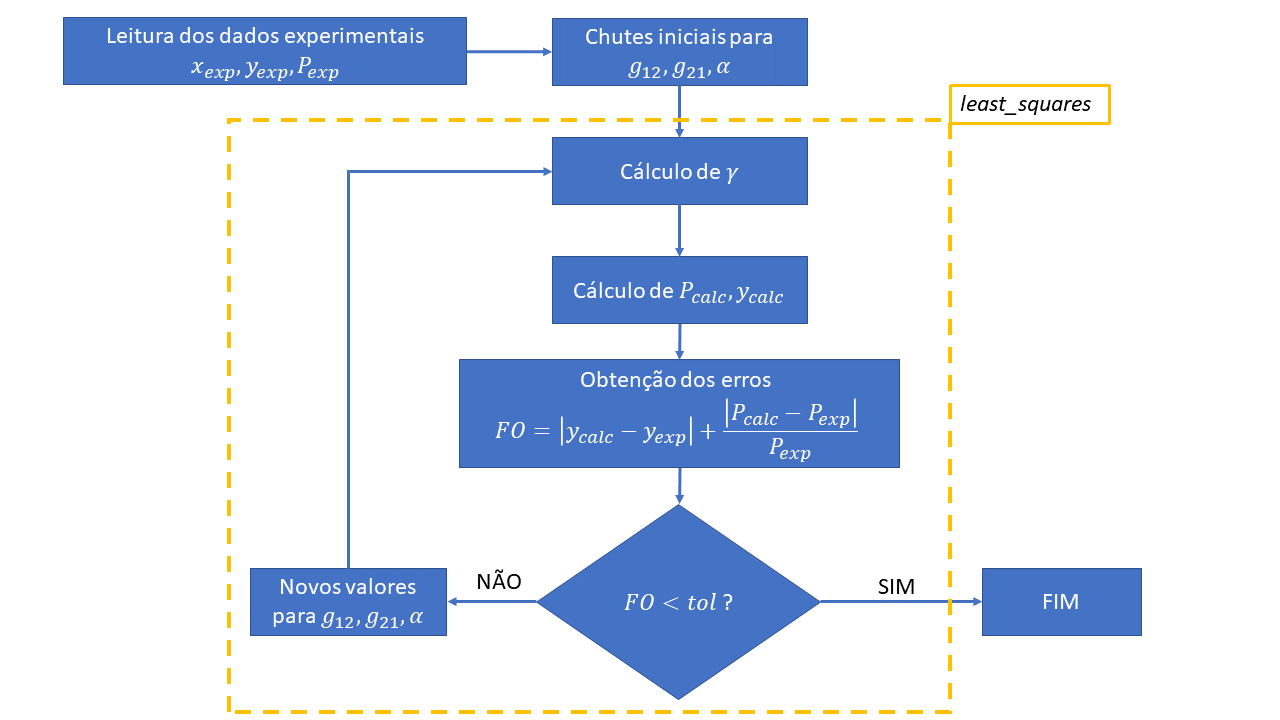

Assim, precisamos de 2 funções auxiliares no código: <br>
1. A função que contém a Função Objetivo a ser minimizada: essa função deverá conter os parâmetros a serem estimados, o cálculo dos erros obtidos com o parâmetro e a avaliação da função objetivo; <br>
2. Uma função com o modelo NRTL: essa função receberá os parâmetros que estão sendo otimizados e fornecerá como resposta os coeficientes de atividade calculados com os parâmetros atuais. Esses coeficientes de atividade serão utilizados no cálculo do ELV. <br>
<br>
**INÍCIO (linhas 1-4)** <br>
Iniciamos o código, então, importando as funções necessárias. Desta vez, utilizaremos a função de mínimos quadrados _least_squares_ do pacote de otimização do SciPy. <br>
<br>
**NRTL (linhas 6-41)** <br>
Após, criaremos a função NRTL, que receberá os parâmetros e condições de temperatura e composição, para o cálculo dos coeficientes de atividade (linhas 7-41). <br>
<br>
**OTIMIZAÇÃO (linha 43-100)** <br>
Depois de criada a função NRTL, criamos a função de otimização dos parâmetros. <br>
Logo no início dessa função (linhas 46-48) trocamos os nomes dos parâmetros de "par" para seus nomes comuns no modelo. Note que o parâmetro alpha está sendo dividido por 1000; fazemos isso devido à grande diferença de magnitude entre os parâmetros g12 e g21 (que ficam em torno de 1000 a 5000) do parâmetro alpha (que fica entre 0 e 1). Dessa maneira, os 3 parâmetros estarão na mesma ordem de magnitude e evitaremos problemas na estimação de parâmetros. Criamos as matrizes de g e alpha nas linhas 50 e 52, essa forma de matriz é adotada devido à maneira que a função NRTL está programada. <br>
<br>
**Leitura dos Dados (linhas 61-68)** <br>
Iniciamos a leitura dos dados experimentais do arquivo abrindo o arquivo que contém os dados (linha 55) e alocamos o arquivo aberto no objeto fID. <br>
Na linha 56 varremos o número de linhas do arquivo para que possamos criar o _loop_ das linhas 62-65. Assim, os valores são inseridos em xexp, yexp e Pexp linha a linha. Por exemplo, na linha 63 adicionamos sempre ao final da lista xexp um novo valor (comando _append_). O valor é sempre convertido para float.
A linha, representada por i, é dividida com o comando _split_. O critério para divisão, neste caso, é um "TAB", por este motivo utilizamos como argumento do comando _split_ '\t', que simboliza a tecla TAB. Por fim, o índice (neste caso [0]) identifica qual dos dados da linha dividida está sendo lido. <br>
Nas linhas 66 a 68 convertemos a lista criada para vetor e também convertemos as pressões experimentais de Psi para Pa. <br>
<br>
**Pressão de saturação (linhas 74-80)** <br>
Nas linhas 75-80 calculamos as pressões de saturação através da equação de Antoine. Com os parâmetros utilizados, a resposta é dada em bar, portanto realizamos a conversão para Pascal. <br>
<br>
**Cálculos de ELV (linhas 82-95)** <br>
Iniciamos alocando espaço para as variáveis P, x e y. <br>
P terá o tamanho do número de pontos calculados; x terá o tamanho do número de componentes (2) e será atualizado a cada loop; y terá o número de linhas igual ao número de componentes (2) e número de colunas igual ao número de pontos calculados (portanto, tamanho [NCxNP]). <br>
O loop principal é feito para cada ponto experimental (NP), assim, ao passarmos a primeira vez no loop x[0] é igual ao primeiro valor de x experimental (xexp[i], i=0) e, portanto, x[1] é igual a 1-xexp. <br>
Utilizamos o vetor de composição da fase líquida (x) como entrada da função NRTL, que fornece como resposta um vetor de coeficientes de atividade. Com os coeficientes de atividade, calculamos as pressões parciais de cada componente (linhas 91-92) e a pressão total do sistema como a soma das pressões parciais (linha 93). <br>
Por fim, as composições na fase vapor são calculadas nas linhas 94-95 para cada componente (loop em j) em cada ponto experimental (loop em i). <br>
Nas linhas 97 e 98 calculamos os desvios dos valores calculados dos dados experimentais e na linha 99 somamos esses resíduos em uma função objetivo a ser minimizada. Assim, o programa irá buscar minimizar FO alterando os valores dos parâmetros que estão sendo estimados - as variáveis contidas em _par_ (g12, g21 e alpha). <br>
<br>
**PROGRAMA PRINCIPAL (linhas 102-167)** <br>
A função a ser otimizada (optpar) será chamada através da função _least_squares_ do pacote de otimização do SciPy, com chutes iniciais de 1600, 4000 e 250
para g12, g21 e alpha, respectivamente. Além disso, utilizamos restrições para os três parâmetros, sendo os limites inferiores iguais a 1000, 1000 e 100
e os superiores iguais a Infinito, Infinito e 1000, para g12, g21 e alpha, respectivamente. <br>
A sintaxe da função fica: <br>
_solução = least_squares(nome_funcao, [chutes_iniciais], bounds=([lim_inferiores],[lim_superiores])_ <br>
<br>
Da resposta, retiramos os valores dos parâmetros estimados (sol.x) e os utilizamos agora para obter a curva de ELV. <br>
O procedimento para o cálculo de equilíbrio é exatamente igual ao realizado dentro da função _optpar_, com a diferença de que não utilizamos apenas os dados experimentais (pois desejamos obter toda a curva e não apenas alguns pontos) mas toda a faixa de 0 a 1. <br>
<br>
Este é um problema que possui alto grau de complexidade, são necessários diversos conceitos de termodinâmica, de estatística, de otimização e de programação para a resolução de um único problema. <br>
Portanto, tome um tempo para refazer o exemplo acima com as suas "maneiras" de programar, busque alterar o código, utilizar outras funções de otimização do SciPy, outros modelos termodinâmicos (por exemplo, Wilson ou van Laar) ou ainda outras misturas. <br>
Reveja esse exemplo de diferentes maneiras e tente adaptá-lo para outros problemas e desenvolva suas habilidades de resolução de problemas. <br>
<br>

# Exercícios <br>
1. Refaça o último exemplo utilizando outros modelos termodinâmicos da sua preferência. <br>
a) A curva se ajustou? O modelo otimizado foi capaz de descrever a curva de equilíbrio corretamente? <br>
b) Quais os valores dos parâmetros encontrados? Eles são próximos dos encontrados na literatura? <br>
c) Qual o valor final da função objetivo? <br>